In [ ]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

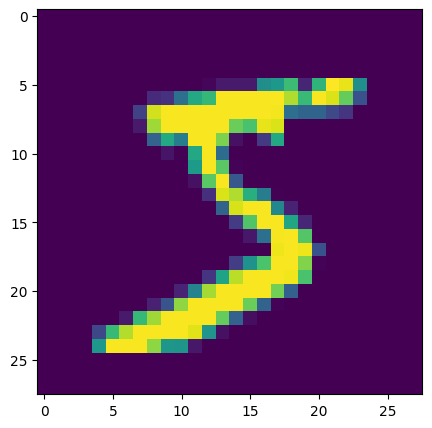

In [4]:
plt.figure(figsize=(5, 5))
plt.imshow(X_train[0, :, :])
plt.show()

In [5]:
y_train[0]

5

In [6]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
y_train[0], y_test[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))

In [11]:
def build_model(learning_rate:float, lambda_reg_param:float):
    hidden_layer_nodes = 256
    output_layer_nodes = 10

    model = Sequential()
    model.add(Dense(units=hidden_layer_nodes, 
                    activation='relu', 
                    input_dim=X_train.shape[1]))
    model.add(Dense(units=hidden_layer_nodes, 
                    activation='leaky_relu', 
                    kernel_regularizer=regularizers.l2(lambda_reg_param)))
    model.add(Dense(units=output_layer_nodes, 
                    activation='softmax', 
                    kernel_regularizer=regularizers.l2(lambda_reg_param)))

    stochastic_gradient_descent = optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', 
                  optimizer=stochastic_gradient_descent, 
                  metrics=['accuracy'])
    
    return model

In [12]:
learning_rate = 0.1
lambda_reg_param = 0
model = build_model(learning_rate, lambda_reg_param)

In [13]:
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=64, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8430 - loss: 0.5605 - val_accuracy: 0.9479 - val_loss: 0.1729
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9510 - loss: 0.1620 - val_accuracy: 0.9650 - val_loss: 0.1170
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9693 - loss: 0.1041 - val_accuracy: 0.9688 - val_loss: 0.0996
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9774 - loss: 0.0769 - val_accuracy: 0.9719 - val_loss: 0.0890
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9820 - loss: 0.0626 - val_accuracy: 0.9701 - val_loss: 0.0918


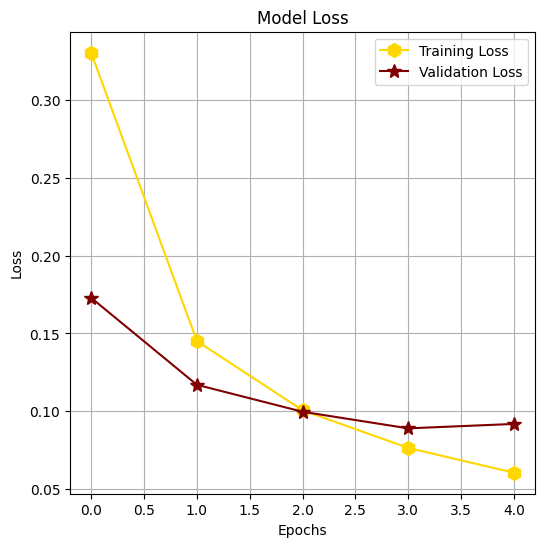

In [14]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'], 
         label='Training Loss', 
         color='gold', 
         marker='h', 
         markersize=10)
plt.plot(history.history['val_loss'], 
         label='Validation Loss', 
         color='maroon', 
         marker='*', 
         markersize=10)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()
plt.show()

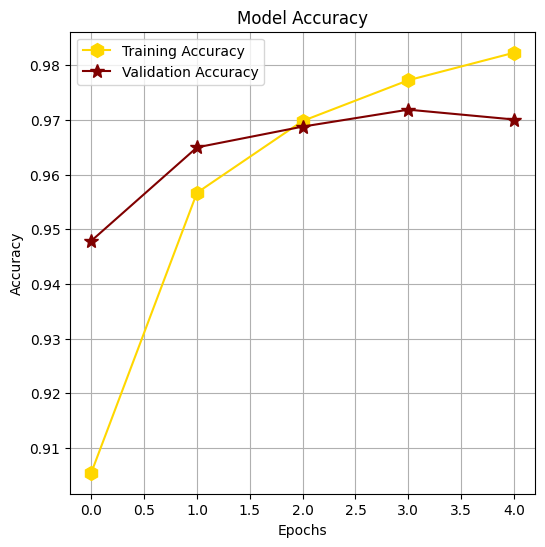

In [15]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'], 
         label='Training Accuracy', 
         color='gold', 
         marker='h', 
         markersize=10)
plt.plot(history.history['val_accuracy'], 
         label='Validation Accuracy', 
         color='maroon', 
         marker='*', 
         markersize=10)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [16]:
test_preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [17]:
test_pred_class = np.argmax(test_preds, axis=1)

In [18]:
y_test = np.argmax(y_test, axis=1)

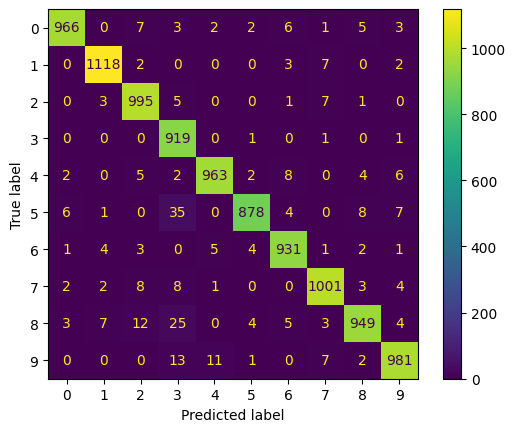

In [19]:
ConfusionMatrixDisplay(confusion_matrix(test_pred_class, y_test)).plot()

In [20]:
print(classification_report(test_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       995
           1       0.99      0.99      0.99      1132
           2       0.96      0.98      0.97      1012
           3       0.91      1.00      0.95       922
           4       0.98      0.97      0.98       992
           5       0.98      0.94      0.96       939
           6       0.97      0.98      0.97       952
           7       0.97      0.97      0.97      1029
           8       0.97      0.94      0.96      1012
           9       0.97      0.97      0.97      1015

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

